In [ ]:
!pip install torchview

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#pytorch tools
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import models, Module
from torchsummary import summary
from torchview import draw_graph


#sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import cv2

#load dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhbagchi/deepfake-image-detection")

print("Path to dataset files:", path)

100%|██████████| 476M/476M [00:23<00:00, 21.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurabhbagchi/deepfake-image-detection/versions/2


In [ ]:
folders = os.listdir(path)
print(folders)

['Sample_fake_images', 'test-20250112T065939Z-001', 'train-20250112T065955Z-001']


In [ ]:
g_train = {"fake": [], "real": []}
g_test = {"fake": [], "real": []}

base_dirs = [
    "/root/.cache/kagglehub/datasets/saurabhbagchi/deepfake-image-detection/versions/2/train-20250112T065955Z-001",
    "/root/.cache/kagglehub/datasets/saurabhbagchi/deepfake-image-detection/versions/2/test-20250112T065939Z-001"

]

#labels
labels = ["fake", "real"]

#Read the images
for base_dir in base_dirs:
  for label in labels:
    #Construct the image directory path
    img_dir = os.path.join(base_dir, "train" if "train" in base_dir else "test", label)

    #list all files in the directory and construct full paths
    files = [os.path.join(img_dir, x) for x in os.listdir(img_dir)]

    #Append files to the appropriate dictionary
    if "train" in base_dir:
      g_train[label] += files

    else:
      g_test[label] += files
print("done")

done


In [ ]:
#merge all images and labels accordingly
all_images = []
all_labels = []
for label in labels:
  all_images += g_train[label] + g_test[label]
  all_labels += [label] * len(g_train[label]) + [label] *len(g_test[label])

In [ ]:
#display the tabels
data = pd.DataFrame({"images": all_images, "labels": all_labels})
display(data)

images labels
0    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
1    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
2    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
3    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
4    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
..                                                 ...    ...
973  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
974  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
975  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
976  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
977  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real

[978 rows x 2 columns]

In [ ]:
#for better randomization, shuffles the data
data = data.sample(frac = 1, random_state=42) #Shuffle in place
data.reset_index(drop=True, inplace=True) #reset index in place

#Display the shuffled DataFrame
display(data)

images labels
0    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
1    /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
2    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
3    /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
4    /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
..                                                 ...    ...
973  /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
974  /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
975  /root/.cache/kagglehub/datasets/saurabhbagchi/...   real
976  /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake
977  /root/.cache/kagglehub/datasets/saurabhbagchi/...   fake

[978 rows x 2 columns]

In [ ]:
#Convert the labels into numeric format
label_map= {'fake':0, 'real':1}

#apply into the table
data['labels'] = data['labels'].map(label_map)

#Display the updated DataFrame
display(data)

images  labels
0    /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
1    /root/.cache/kagglehub/datasets/saurabhbagchi/...       1
2    /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
3    /root/.cache/kagglehub/datasets/saurabhbagchi/...       1
4    /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
..                                                 ...     ...
973  /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
974  /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
975  /root/.cache/kagglehub/datasets/saurabhbagchi/...       1
976  /root/.cache/kagglehub/datasets/saurabhbagchi/...       0
977  /root/.cache/kagglehub/datasets/saurabhbagchi/...       0

[978 rows x 2 columns]

In [ ]:
#Read the images
Images = []
Labels = []

#height and width
max_height = float('-inf')
min_height = float('inf')
max_width = float('-inf')
min_width = float('inf')

for i in range(len(data)):
  image_path = data['images'][i]
  label = data['labels'][i]
  try:
    #read images
    img = cv2.imread(image_path)
    #Convert bgr to rgb
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img is None:
      raise FileNotFoundError("Image not found or unable to read the file")

    Images.append(img)
    Labels.append(label)
    max_height = max(max_height, img.shape[0])
    min_height = min(min_height, img.shape[0])
    max_width = max(max_width, img.shape[1])
    min_width = min(min_width, img.shape[1])

  except Exception as e:
    print("An unexpected error occurred:", e)

print(f"Max Height: {max_height}")
print(f"Min Height: {min_height}")
print(f"Max Width: {max_width}")
print(f"Max Width: {min_width}")


Max Height: 7091
Min Height: 135
Max Width: 8495
Max Width: 183


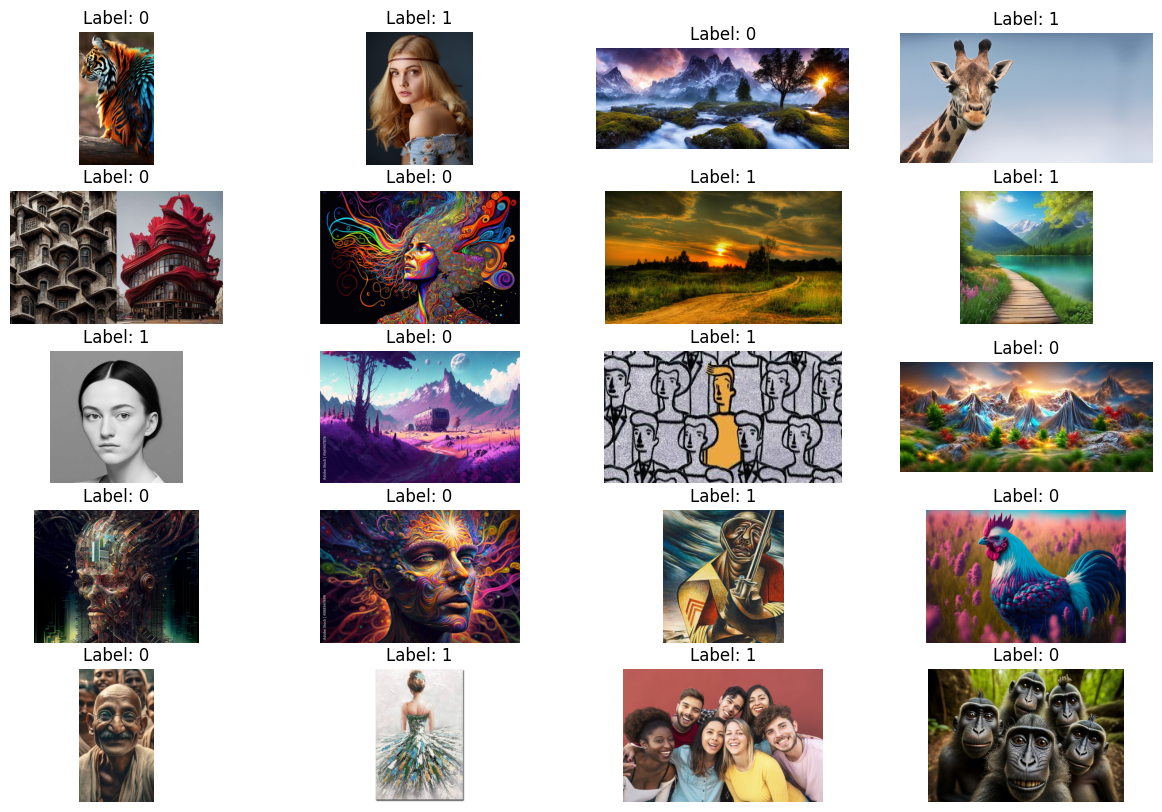

In [ ]:
#Visualize some images
#number of images

num_imgs = 20
ncols = 4
nrows = (num_imgs + ncols - 1) // ncols

#create a figure to display the images
plt.figure(figsize=(15, 10))
for i, img in enumerate(Images[:num_imgs]):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(img)
  plt.title(f"Label: {Labels[i]}")
  plt.axis('off')

plt.show()

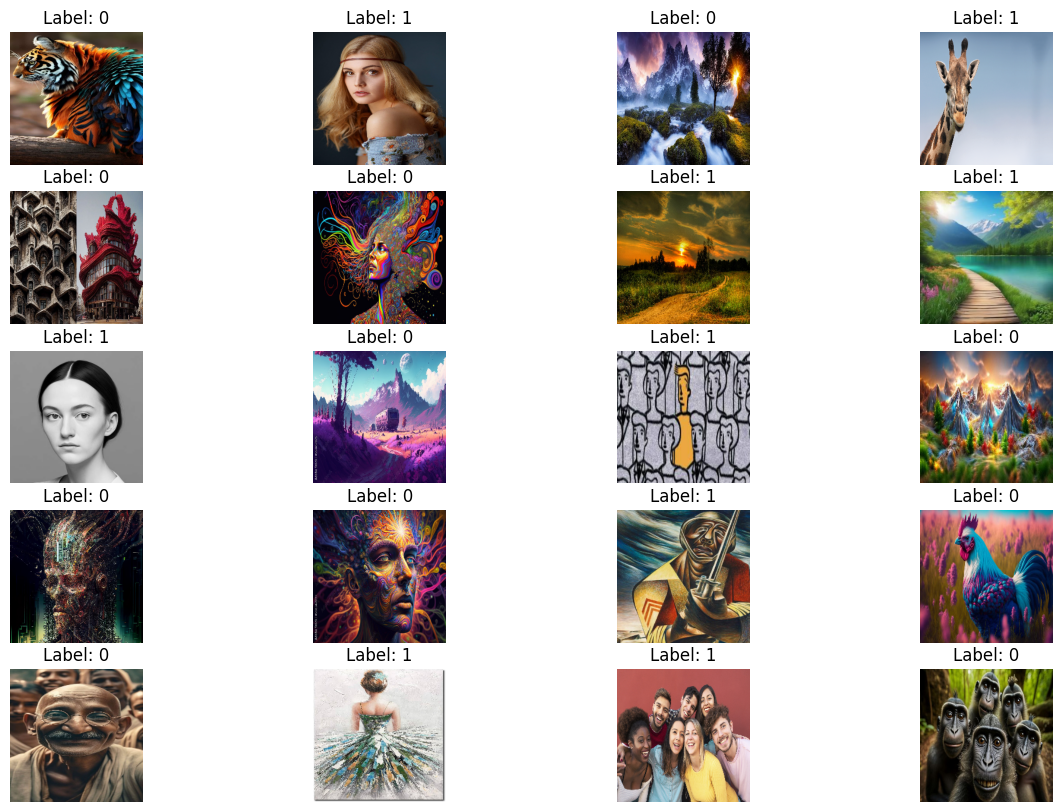

In [ ]:
#Resize the images
target_size = (224, 224)
Images_resize = [cv2.resize(img, target_size) for img in Images]

num_imgs = 20
ncols = 4
nrows = (num_imgs + ncols - 1) // ncols

#create a figure to display the images
plt.figure(figsize=(15, 10))
for i, img in enumerate(Images_resize[:num_imgs]):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(img)
  plt.title(f"Label: {Labels[i]}")
  plt.axis('off')

plt.show()

In [ ]:
#TRAIN-VAL-TEST SPLITING:
#Step 1: split into 95% training and 5% testing.
X_train, X_test, y_train, y_test = train_test_split(Images_resize, Labels, test_size=0.05, random_state=42)

#Step2: split the training set into 95% training and 5% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.05, random_state=42)

#step5: Verify the shapes of the generators
print("Training data shape:", len(X_train))
print("Validation data shape:", len(X_val))
print("Testing data shape:", len(X_test))

Training data shape: 882
Validation data shape: 47
Testing data shape: 49


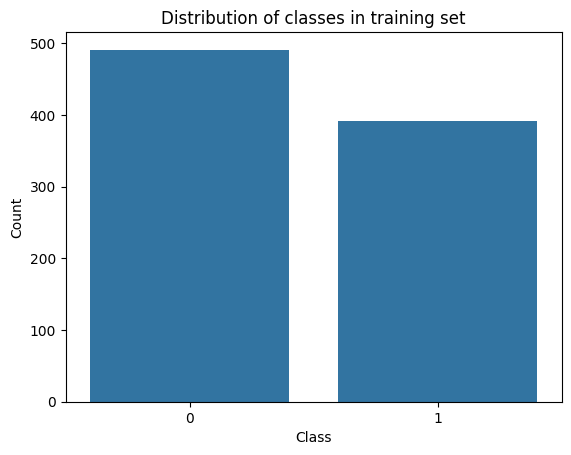

In [ ]:
#Count of fake and real images in training set:
#Create a countplot

sns.countplot(x=np.array(y_train))

#Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of classes in training set")

#Show the plot
plt.show()

In [ ]:
#Custome dataseT:
#Define transformations: Augment First, then normalize
transform = transforms.Compose([
    transforms.ToPILImage(), #Convert opencvv numpy image to PIL format
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(), #Convert to tensor[0,1], normalized pixel
])

class CustomImageDataset(Dataset):
  def __init__(self, images, labels, transform = None):
    """
    images: List of numpy arrays(H, W, C)
    labels: list or numpy array of shhape(N,)
    transform: Augmentation transformations
    """
    self.images = np.array(images) #keep as Numpy array, apply transforms later
    self.labels = torch.tensor(np.array(labels), dtype = torch.long)
    self.transform = transform #Store the transform function


  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
    image = self.images[idx]

    if self.transform:
      image = self.transform(image) #apply augmentations

    label = self.labels[idx]
    return image, label

#Creat dataset and DataLoader
train_dataset = CustomImageDataset(X_train, y_train, transform = transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = CustomImageDataset(X_val, y_val, transform=transform)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True)

In [ ]:
#Fetch one batch
images, labels = next(iter(train_dataloader))
print(images.shape)
print(labels)

torch.Size([64, 3, 224, 224])
tensor([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1])


In [ ]:
#Train model:
#load the pretrained model
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

#Freeze all layers except the last ones

for param in model.parameters():
  param.requires_grad = False #unfreeze all layers

#modify the fully connected (FC) layer
num_ftrs = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 1024), #first fully connected layer
    nn.BatchNorm1d(1024), #batch normalization
    nn.LeakyReLU(), #Activation function
    nn.Dropout(0.5), #Dropout for regularization

    nn.Linear(1024, 512), #second fully connected layer
    nn.BatchNorm1d(512), #batch normalization
    nn.LeakyReLU(), #Activation function
    nn.Dropout(0.5), #Dropout for regularization

    nn.Linear(512, 1), #final fully connected layer
    nn.Sigmoid() #sigmoid activation for binary classification

)
#move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


nn.sequential - this part replaces the original fully connected layer of resnet5o with a new custom design.

- nn.linear - thes are fully connected layers that transform the input features,
- batch normalization - is used to stabilize and speed up training.

- nn.LeakyRelu - is an activation function that introduces non-linearity

- dropout prevent overfitting

- sigmoid : the final layer uses a sigmoid activation function to produce a probability between 0 and 1

In [ ]:
#define loss function & optimizer
criterion = nn.BCELoss() #binary cross entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#Define accuracy function
def binary_accuracy(preds, labels):
  preds = (preds >= 0.5).float() #convert probabilitiers to binary 0 or 1
  return (preds == labels).sum().item() / labels.size(0)

#Adaptive learning rate scheduler (Reduce LR if val_loss does not improve for 3 epochs)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode = 'min', patience = 3, factor = 0.5)

#Training function
#Training function
def train(model, train_loader, val_loader, criterion, optimizer, scheduler, epochs = 10, save_path="best_model.pth"):
  best_val_loss = float('inf')

  # Initialize lists to store metrics
  train_losses = []
  train_accuracies = []
  val_losses = []
  val_accuracies = []

  for epoch in range(epochs):
    model.train()
    train_loss, train_acc = 0.0, 0.0

    for images, labels in train_loader:
      images, labels = images.to(device), labels.to(device).float().unsqueeze(1) #ensure labels are float


      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
      train_acc += binary_accuracy(outputs, labels)

    #validation
    model.eval()
    val_loss, val_acc = 0.0, 0.0
    with torch.no_grad():
      for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device). float().unsqueeze(1)

        outputs = model(images)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        val_acc += binary_accuracy(outputs, labels)
      #Reduce lr if validation loss does not improve
      scheduler.step(val_loss)

      #save best model (based on validation loss)
      if val_loss < best_val_loss:
        best_val_loss = val_loss
        print(f"saving the model with loss {best_val_loss}")
        torch.save(model.state_dict(), save_path)

      #Get the current learning rate
      current_lr = optimizer.param_groups[0]['lr']

      #print training and validation metrics
      print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss/len(train_loader):.4f}, Train Acc: {train_acc/len(train_loader):.4f} | "
              f"Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {val_acc/len(val_loader):.4f}|",
              f"LR:{current_lr:.6f} ")

    # Append metrics for this epoch
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_acc / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc / len(val_loader))

  # Return the collected metrics
  return train_losses, train_accuracies, val_losses, val_accuracies




In [ ]:
#training
train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler,
      epochs=100, save_path="best_resnet50.pth")

saving the model with loss 0.6800547242164612
Epoch 1/100 | Train Loss: 0.0057, Train Acc: 0.9978 | Val Loss: 0.6801, Val Acc: 0.8298| LR:0.000100 
saving the model with loss 0.6093134880065918
Epoch 2/100 | Train Loss: 0.0088, Train Acc: 0.9963 | Val Loss: 0.6093, Val Acc: 0.8936| LR:0.000100 
saving the model with loss 0.5912647247314453
Epoch 3/100 | Train Loss: 0.0084, Train Acc: 0.9955 | Val Loss: 0.5913, Val Acc: 0.8298| LR:0.000100 
Epoch 4/100 | Train Loss: 0.0076, Train Acc: 0.9960 | Val Loss: 0.7679, Val Acc: 0.8085| LR:0.000100 
Epoch 5/100 | Train Loss: 0.0025, Train Acc: 1.0000 | Val Loss: 1.1288, Val Acc: 0.8511| LR:0.000100 
Epoch 6/100 | Train Loss: 0.0146, Train Acc: 0.9944 | Val Loss: 0.8443, Val Acc: 0.8298| LR:0.000100 
Epoch 7/100 | Train Loss: 0.0059, Train Acc: 0.9978 | Val Loss: 0.7702, Val Acc: 0.8511| LR:0.000050 
Epoch 8/100 | Train Loss: 0.0037, Train Acc: 1.0000 | Val Loss: 0.8784, Val Acc: 0.8085| LR:0.000050 
Epoch 9/100 | Train Loss: 0.0100, Train Acc: 0

([0.005701985222653353,
  0.008772464986707616,
  0.008382222394824826,
  0.007589891758730768,
  0.0024847905983084013,
  0.014568343253423726,
  0.005923103931958654,
  0.0037256097202771343,
  0.009983964177081361,
  0.006786063876851196,
  0.005593254097870418,
  0.005352398902427272,
  0.003512440369896857,
  0.002055470528180844,
  0.003966928235188659,
  0.004228732455106053,
  0.0020003018206417827,
  0.002997125723465745,
  0.003406210841993535,
  0.0031682954317407814,
  0.006289391526869232,
  0.004091699825949036,
  0.0035277707231996048,
  0.002600582241679409,
  0.0023638084697137985,
  0.0042892823205745246,
  0.005515426139546824,
  0.002175337315877966,
  0.0033232529250588933,
  0.0014869302602684392,
  0.0022414710755193873,
  0.0011206752190316496,
  0.006015431688865647,
  0.00628332066740508,
  0.0034949193068314344,
  0.0039573686746215185,
  0.003090041219755741,
  0.0036941787121967146,
  0.003971031563456303,
  0.0017293035177447433,
  0.003666458598412906,
  

In [ ]:
#performance on test data
test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),

])

test_dataset = CustomImageDataset(X_test, y_test, transform=test_transform)
test_dataloader= DataLoader(test_dataset, batch_size = len(X_test), shuffle=False)

#Validation
model.eval()
val_acc = 0.0
with torch.no_grad():
  for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device).float().unsqueeze(1)

    outputs = model(images)
    val_acc += binary_accuracy(outputs, labels)
print(f"test Accuracy: {val_acc}")

test Accuracy: 0.7551020408163265


saving the model with loss 0.74459308385849
Epoch 1/18 | Train Loss: 0.0032, Train Acc: 0.9989 | Val Loss: 0.7446, Val Acc: 0.8298| LR:0.000000 
saving the model with loss 0.61970055103302
Epoch 2/18 | Train Loss: 0.0014, Train Acc: 1.0000 | Val Loss: 0.6197, Val Acc: 0.8085| LR:0.000000 
Epoch 3/18 | Train Loss: 0.0014, Train Acc: 1.0000 | Val Loss: 0.6329, Val Acc: 0.8085| LR:0.000000 
Epoch 4/18 | Train Loss: 0.0014, Train Acc: 1.0000 | Val Loss: 0.9984, Val Acc: 0.8085| LR:0.000000 
Epoch 5/18 | Train Loss: 0.0075, Train Acc: 0.9978 | Val Loss: 0.9173, Val Acc: 0.8085| LR:0.000000 
Epoch 6/18 | Train Loss: 0.0035, Train Acc: 0.9989 | Val Loss: 0.7580, Val Acc: 0.8298| LR:0.000000 
Epoch 7/18 | Train Loss: 0.0018, Train Acc: 1.0000 | Val Loss: 0.8507, Val Acc: 0.8298| LR:0.000000 
Epoch 8/18 | Train Loss: 0.0023, Train Acc: 0.9989 | Val Loss: 0.7423, Val Acc: 0.8511| LR:0.000000 
Epoch 9/18 | Train Loss: 0.0020, Train Acc: 1.0000 | Val Loss: 0.8840, Val Acc: 0.8085| LR:0.000000 
Epo

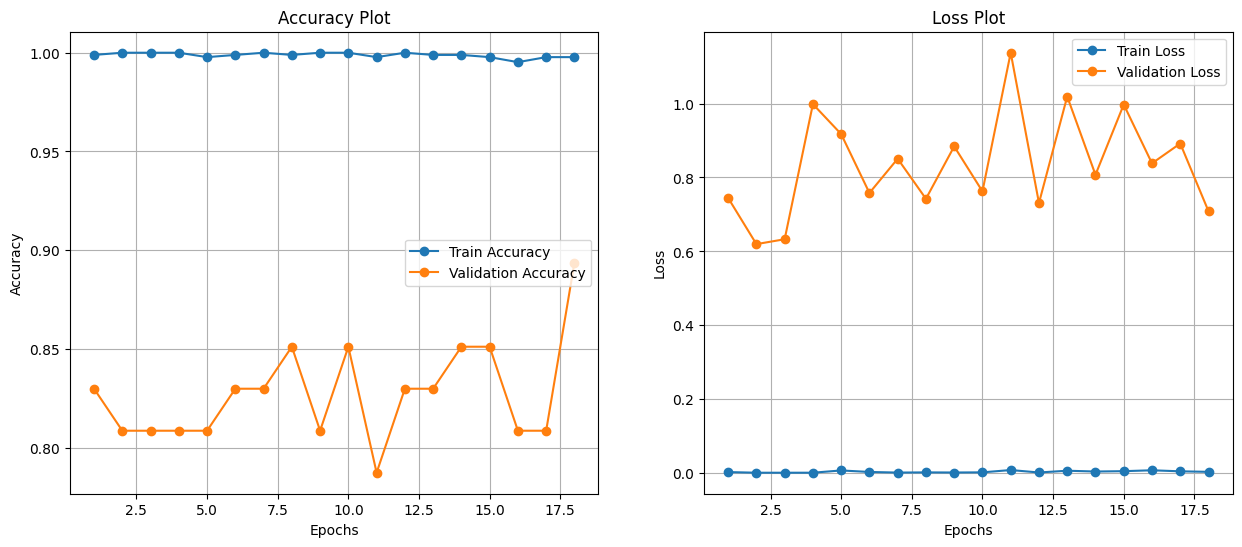

In [ ]:
import matplotlib.pyplot as plt

# Treinamento e coleta das métricas
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, epochs=18)

# Criando a figura
plt.figure(figsize=(15, 6))

# Gráfico de Acurácia (Train vs Validation)
epochs = range(1, len(train_losses) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend(loc='center right')
plt.grid()

# Gráfico de Loss (Train vs Validation)
plt.subplot(1, 2, 2)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend(loc='upper right')
plt.grid()

plt.show()


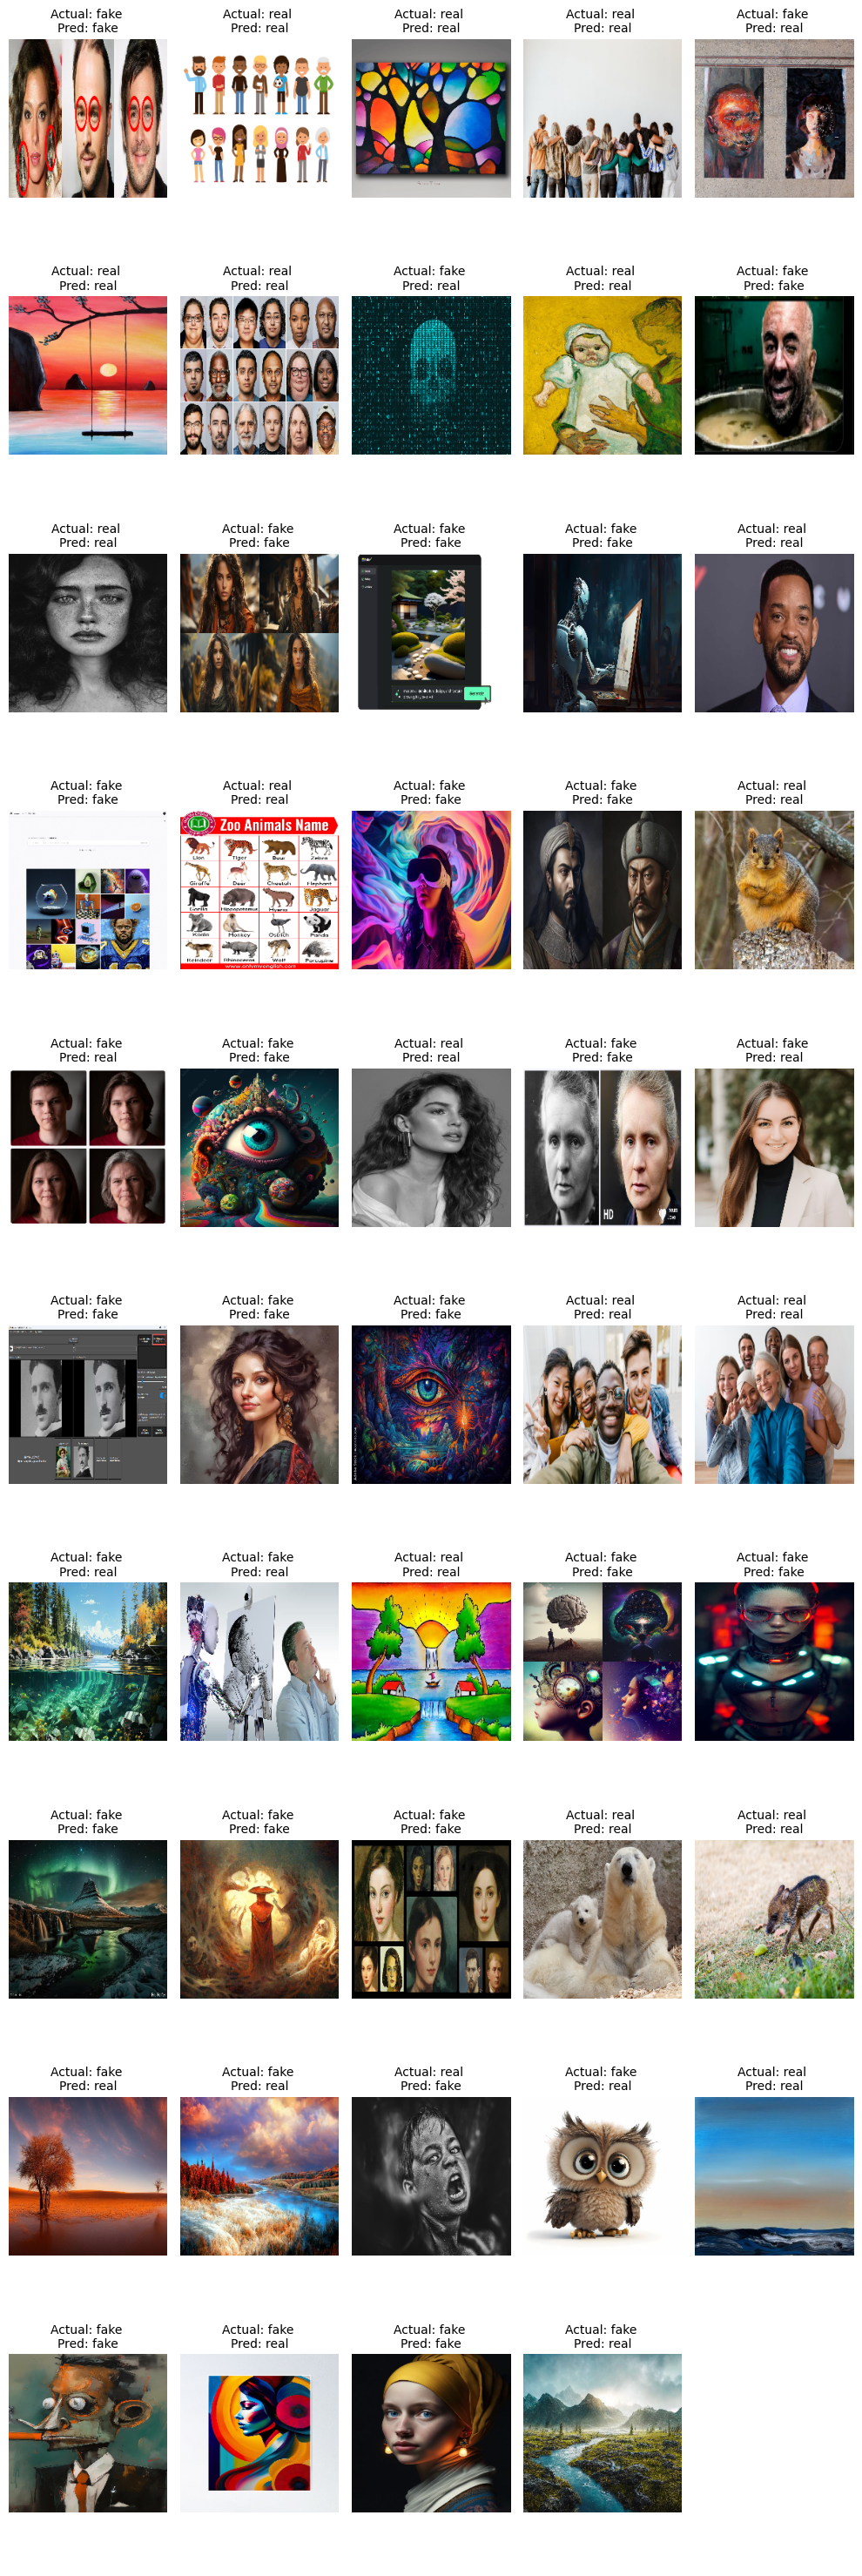

In [ ]:
def plot_test_images(image_list, labels, preds, class_names, num_images=10):
  """]
  image_list: List of test images(NumPy arrays in (H, W, C) for mat)
  labels: List or array of actual labels
  preds: list or array of predicted labels
  class_names: Dictionary or list mapping label indices to class names.
  num_images: Number of images to display

  """
  num_images = min(num_images, len(image_list)) #ensure we don't exceed available images
  ncols = 5
  nrows = int(np.ceil(num_images / ncols)) #Round up rows to fit all images

  fig, axes = plt.subplots(nrows, ncols, figsize = (10, 30))
  axes = axes.flatten()

  for i in range(num_images):
    img = image_list[i] #get image
    actual_label = class_names[labels[i]]
    predicted_label = class_names[1 if preds[i] >= 0.5 else 0]

    axes[i].imshow(img)
    axes[i].set_title(f"Actual: {actual_label} \nPred: {predicted_label}", fontsize=10)
    axes[i].axis("off")

  #Hide unused subplots(if any)
  for i in range(num_images, len(axes)):
    axes[i].axis("off")
  plt.tight_layout()
  plt.show()

#plot
plot_test_images(image_list=X_test, labels=y_test, preds=outputs, class_names={0: "fake", 1: "real"}, num_images=len(X_test))